## 125 Years of Olympic History - Exploratory Data Analysis,EDA
## **By Daniel Rodin and Tal Gottfeld**

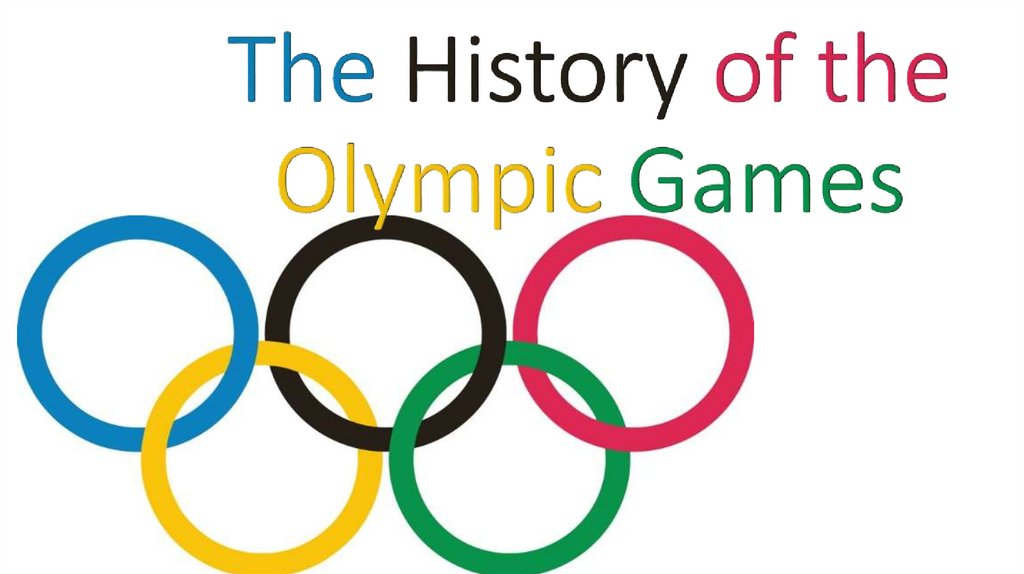

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import andrews_curves
import re
import numpy as np
from datetime import datetime
from PIL import Image
import requests
from io import BytesIO
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from scipy.ndimage import gaussian_filter
import matplotlib as mpl
from matplotlib import rcParams
import plotly.express as px
import matplotlib.image as imag
import matplotlib.image as mpimg

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
my_path = '/gdrive/MyDrive/EDA.Olympics'
os.listdir(my_path)

['noc_regions.csv',
 'USA_OlympucG_Funding_1999to2015.csv',
 'GDP_CHN_csv_.csv',
 'usa.image.png',
 'country_definitions.csv',
 'medals2020.csv',
 'athlete_events.csv',
 '.ipynb_checkpoints',
 'athletes2020.csv',
 'uk.funds.1995onwards.xlsx',
 'USA.OlympucG.Funding.1999to2015.xlsx',
 'uk.funds.1995onwards.v2.xlsx',
 'GBR.png',
 'Russia_img.svg']

In [ ]:
atl = pd.read_csv(my_path+'/athlete_events.csv')
atl2020 = pd.read_csv(my_path+'/athletes2020.csv')
med2020 = pd.read_csv(my_path+'/medals2020.csv')
noc = pd.read_csv(my_path+'/country_definitions.csv')
df_USA_funding = pd.read_csv(my_path+'/USA_OlympucG_Funding_1999to2015.csv')
df_china_GDP = pd.read_csv(my_path+'/GDP_CHN_csv_.csv')
UK_Funding = pd.read_excel(my_path+'/uk.funds.1995onwards.xlsx')
UK_Funding_Updated = pd.read_excel(my_path+'/uk.funds.1995onwards.v2.xlsx')
print(atl.shape)
atl.head(2)

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


# Introduction

Our work has been prepared based on a module in the Data Science Boot Camp course. 

Our work is based on two datasets from the website 'Kaggle' (1)athletes, which represent all the 120-year Olympic Games and (2) Tokyo representing the 21 Olympic Games in Tokyo.
You'll see, we've also combined data from different sources like the 'Bloomberg' and 'UK Sport' websites to enrich our point of view and input).




# Goal & Objective 

Our objective is to (1) find the 'right' formula for a winning team or  athletes and (2) undertand how global trends impact the games


# EDA's Key Findings



Micro Analysis -

1.   Micro Analysis


> 1.1 Gender - Over the years, women have made 
significant progress on equality, as is evident in the Games.

> 1.2 Seasonal games - Summer: Winter games have a 4:1 ratio in athletes' participation. Especially in view of the prevalence of Winter sports in different countries. The Summer and Winter Games were divided in 1992.


> 1.3 Winning Formulas -Our typical athletes vary among sports. Throughout the years they started to take shape.


> 1.3.1 Age - There was no age limit at the beginning of the Olympics games (we can see Archery Athletes age 50).
Today, the optimal age for gold medalists is set at 25.

> 1.3.2 Height - The median Height for gold medal winners is set for 178, though, our research revealed height could be a crucial factor in some sports like Baseball, Volleyball, where, height could pass 200 cm height.

> 1.3.3 Weight - The average gold-medalled athlete weighs approximately 73 kg. Though, it will vary from gymnastics to weightlifting.


> 1.3.4 Serial Competitors - Being a serial competitor at an Olympic Games does not guarantee medals.

> 1.3.5 Countries - Over the years, the United States, Russia, Germany and the United Kingdom have taken the lead at the Olympics.

> 1.3.6 Sports - Swimming, athletics, basketball, rowing, ice hockey are the best sports for medals




2.   Macro Analysis

> 2.1 USSR - The impact of USSR dissolution was crucial in the forming of USA as Olympic leader  


> 2.2 Motivation Index - Hosting the Olympic games bears a significant role in motivating the hosting countries.
Hosting Olympic Games is a catalyzer to scale the hosting country performances 

> 2.3 ROI,Funding Sports - We analyzed the ROI of the USA and UK. We found a full alignment between the volume of investment and performances.

> 2.4 ROI,GDP and medals -  We found there is no direct correlation between GDP development and medals gain over the years.


# Key Challenges


1.   Cleaning the data - Team
2.   Merging different datasets and standartization -   Tokyo, GDP 
3.   Data normalization
4.   Visualization challenges - USSR


# Data preparation, Part I: Merge files, cleaning and standartization 

In [ ]:
# We started by merging Japan Games (alt2020 file) into our main dataset in order to get a wider view of the Olympic Games
#Lets look at our data first
atl2020.head(2)

,Name,Sex,Age,Team,NOC,Sport,Height
0,Aalerud Katrine,F,27.0,Norway,NOR,Cycling Road,NaN
1,Abad Nestor,M,28.0,Spain,ESP,Artistic Gymnastics,165.0


In [ ]:
#Let drop all the unnecessary columns (Vs. our main dataset)
atl2020 = atl2020.drop(['short_name', 'birth_place', 'birth_country', 'discipline_code', 'residence_place', 'residence_country', 'url'], axis=1)

In [ ]:
#We will use a method to standartize the columns titles and create a suitable Series
Names = atl2020.name.map(lambda x: x.title())

In [ ]:
Names.head(2)

0    Aalerud Katrine
1        Abad Nestor
Name: name, dtype: object

In [ ]:
#We will return the series to the df
atl2020.name = Names

In [ ]:
atl2020 = atl2020.replace('Male', 'M')
atl2020 = atl2020.replace('Female', 'F')

In [ ]:
atl2020 = atl2020.rename(columns={'height_m/ft': "Height"})

In [ ]:
newSeries = atl2020.Height.apply(lambda x: str(x)[0:4])

In [ ]:
atl2020.Height = newSeries

In [ ]:
a = atl2020.Height.replace('.01/', "0")
atl2020.Height = a

In [ ]:
newSeries = atl2020.Height.apply(lambda x: float(x)*100)

In [ ]:
atl2020.Height = newSeries

In [ ]:
atl2020 = atl2020.rename(columns={'name': "Name"})
atl2020 = atl2020.rename(columns={'gender': "Sex"})
atl2020 = atl2020.rename(columns={'country_code': "NOC"})
atl2020 = atl2020.rename(columns={'country': "Team"})
atl2020 = atl2020.rename(columns={'discipline': "Sport"})
atl2020 = atl2020.rename(columns={'birth_date': "Age"})

In [ ]:
atl2020.head(1)

,Name,Sex,Age,Team,NOC,Sport,Height
0,Aalerud Katrine,F,1994-12-04,Norway,NOR,Cycling Road,NaN


In [ ]:
birth = atl2020.Age.apply(lambda x: str(x)[0:4])
atl2020.Age = birth

In [ ]:
Age = atl2020.Age.replace('nan', 0)
atl2020.Age = Age

In [ ]:
Age = atl2020.Age.replace('04/1', 0)
atl2020.Age = Age

In [ ]:
birth = atl2020.Age.apply(lambda x: 2021 - float(x))
atl2020.Age = birth

In [ ]:
atl2020.head(2)

,Name,Sex,Age,Team,NOC,Sport,Height
0,Aalerud Katrine,F,27.0,Norway,NOR,Cycling Road,NaN
1,Abad Nestor,M,28.0,Spain,ESP,Artistic Gymnastics,165.0


Medals file - cleaning before the merge

In [ ]:
med2020.head(1)

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,country_code,discipline_code,event,country,discipline
0,Gold Medal,1,00:00.0,KIM JD,KIM Je Deok,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery


In [ ]:
med2020 = med2020.drop(['medal_code', 'medal_date', 'athlete_short_name', 'athlete_sex', 'athlete_link', 'country_code', 'discipline_code', 'event', 'country', 'discipline'], axis=1)

In [ ]:
med2020 = med2020.rename(columns={'medal_type': "Medal"})
med2020 = med2020.rename(columns={'athlete_name': "Name"})

In [ ]:
Names = med2020.Name.map(lambda x: x.title())
med2020.Name = Names

In [ ]:
med2020.replace(['Gold Medal', 'Silver Medal', 'Bronze Medal'], ['Gold', 'Silver', 'Bronze'], inplace=True)

In [ ]:
cols = med2020.columns.to_list()
cols
cols = cols[-1:] + cols[:-1]
med2020 = med2020[cols]

In [ ]:
med2020.head(1)

,Name,Medal
0,Kim Je Deok,Gold


In [ ]:

#Let merge the two files
Tokyo2020 = pd.merge(atl2020, med2020, how='left', on="Name")
Tokyo2020['Year'] = 2021
Tokyo2020['Season'] = 'Summer'

In [ ]:
#Let check it worked
Tokyo2020.head(1)

,Name,Sex,Age,Team,NOC,Sport,Height,Medal,Year,Season
0,Aalerud Katrine,F,27.0,Norway,NOR,Cycling Road,NaN,NaN,2021,Summer


Merging prime dataset and Tokyo

In [ ]:
olym = atl.append(Tokyo2020, sort=False)

In [ ]:
olym.Height.replace(0, np.nan, inplace=True)

In [ ]:
olym.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


Merging the third file with Country description

In [ ]:
noc.head(1)

,NOC,region,notes
0,AFG,Afghanistan,NaN


In [ ]:
noc.rename(columns={'region': 'Country'}, inplace=True)

In [ ]:
noc = noc.drop(['notes'], axis=1)

In [ ]:
olym = pd.merge(olym, noc, how='left', on="NOC")

Cleaning the data - Typos, Teams and Countries definitions / titles 

In [ ]:

olym.loc[olym.Team == 'Soviet Union', 'Country'] = "Soviet Union"
olym.loc[olym.NOC == 'SGP', 'Country'] = "Singapore"
olym.loc[olym.NOC == 'ROC', 'Country'] = "Russia"

In [ ]:
#We started cleaning the Team column, though we came to understand it requires a great deal of work,
#we found an alternative and a much shorter solution - using the 'Country' column instead.
#The below is only partial cleansing, due to problematic Team column

olym.replace("United States of America",'USA', inplace = True)
olym.replace('United States', "USA", inplace = True) 
olym.replace('United States-1', "USA", inplace = True) 
olym.replace('United States-2', "USA", inplace = True) 
olym.replace('United States-3', "USA", inplace = True) 
olym.replace('Virgin Islands', "UK", inplace = True) 
olym.replace('Virgin Islands, US', "UK", inplace = True) 
olym.replace('Virgin Islands, UK', "UK", inplace = True) 
olym.replace('United States Virgin Islands', "USA", inplace = True) 
olym.replace('Austria-1', "Austria", inplace = True)
olym.replace('Austria-2', "Austria", inplace = True)
olym.replace('Tanzania', "United Republic of Tanzania", inplace = True)
olym.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
olym.replace('Congo', "Republic of the Congo", inplace = True)
olym.replace('Lao', "Laos", inplace = True)
olym.replace('Syrian Arab Republic', "Syria", inplace = True)
olym.replace('Serbia', "Republic of Serbia", inplace = True)
olym.replace('Czechia', "Czech Republic", inplace = True)
olym.replace('UAE', "United Arab Emirates", inplace = True)
olym.replace("United Kingdom","UK" ,inplace = True)
olym.replace('Great Britain', "UK", inplace = True)
olym.replace("Russia-1", "Russia", inplace = True)
olym.replace("Russia-2", "Russia", inplace = True)
olym.replace("Russia-3", "Russia", inplace = True)
olym.replace("Athens-1","Athens", inplace = True)
olym.replace("Athens-2","Athens", inplace = True)
olym.replace("Athens-3","Athens", inplace = True)
olym.replace("Thailand-1","Thailand", inplace = True)
olym.replace("Thailand-2","Thailand", inplace = True)
olym.replace("Thailand-3","Thailand", inplace = True)
olym.replace("France-1","France", inplace = True)
olym.replace("France-2","France", inplace = True)
olym.replace("France-3","France", inplace = True)
olym.replace("Italy-1", "Italy", inplace = True)
olym.replace("Italy-2", "Italy", inplace = True)
olym.replace("Italy-3", "Italy", inplace = True)
olym.replace("China-1", "China", inplace = True)
olym.replace("China-2", "China", inplace = True)
olym.replace("China-3", "China", inplace = True)
olym.replace("HKG", "China", inplace = True)
olym.replace("Chinese Taipei", "China", inplace = True)
olym.replace("Soviet Union", "Russia", inplace = True)
olym.replace("Ralia", "Finland", inplace = True)
olym.replace("Freja", "Sweden", inplace = True)
olym.replace("K.S.S.S. 1912-2", "Sweden", inplace = True)
olym.replace("Lasha", "Sweden", inplace = True)
olym.replace("Sweden-1", "Sweden", inplace = True)
olym.replace("Sweden-2", "Sweden", inplace = True)
olym.replace("Sweden-3", "Sweden", inplace = True)
olym.replace("Curacao", "Netherlands", inplace = True)
olym.replace("Western Germany", "Germany", inplace = True)
olym.replace("Germany-1", "Germany", inplace = True)
olym.replace("Germany-2", "Germany", inplace = True)
olym.replace("Germany-3", "Germany", inplace = True)
olym.replace("Canada-1", "Canada", inplace = True)
olym.replace("Canada-2", "Canada", inplace = True)
olym.replace("Canada-3", "Canada", inplace = True)
olym.replace("NLF", "Canada", inplace = True)
olym.replace("Mohawk Indians-2", "Canada", inplace = True)
olym.replace("Toronto Argonauts", "Canada", inplace = True)
olym.replace("Argonaut Rowing Club", "Canada", inplace = True)
olym.replace("Australia/Great Britain", "UK", inplace = True)
olym.replace("Ethnikos Gymnastikos Syllogos", "Greece", inplace = True)

In [ ]:
# Droping abnormal numbers from our datasets
height = olym.Height.apply(lambda x: np.nan if 50.0 > x > 250.0 else x)
olym.Height = height
olym.loc[olym.Height > 300.0, 'Height'] = np.nan
olym.loc[olym.Age > 120.0, 'Age'] = np.nan

In [ ]:
olym.loc[olym.Year == 2021, 'Games'] = "2021 Summer"

In [ ]:
# Filling the Event columns with content
olym.loc[olym.Event == np.nan, 'Event'] = olym.Sport
olym.loc[olym.Event == 'nan', 'Event'] = olym.Sport
event = olym.Event.replace('nan', 'None')
olym.Event = event
event = olym.Event.replace(np.nan, 'None')
olym.Event = event

In [ ]:
olym.Event.fillna(olym.Sport, inplace=True)

In [ ]:
# Filling 2021 Games column with the content of "2021 Summer"
olym.loc[olym.Year == 2021, 'Games'] = "2021 Summer"

# Data preparation, Part II: Normalization 

We performed a QA of our initial findings and found irregularities within the numbers. We decided to normalize the dataset, as you will see below

Pre data normalization

In [ ]:
# Cleaning the Medal column from Nan
olym_adj = olym.query("Medal == ['Gold','Silver','Bronze']")

In [ ]:

df_covert_medals_to_numbers = {'Gold':1,'Silver':1,'Bronze':1,'NA':0}

In [ ]:
olym_adj['medals_Won'] = olym['Medal'].map(df_covert_medals_to_numbers)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



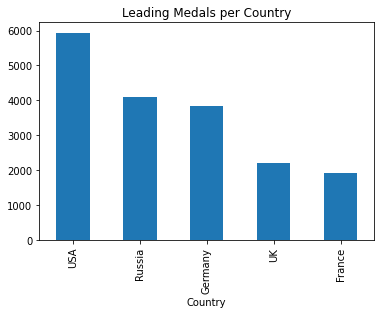

In [ ]:
olym_adj.groupby('Country').medals_Won.sum().sort_values(ascending=False).head().plot.bar(title="Leading Medals per Country");

As seen above, the number of medals is almost double per country


Normalizing the data

In [ ]:
# We will identify and differentiate between single and team events, and normalize the number of medals per team
identify_team_events = pd.pivot_table(olym_adj,
                                      index = ['Team', 'Year', 'Event'],
                                      columns = 'Medal',
                                      values = 'medals_Won',
                                      aggfunc = 'sum').reset_index()

In [ ]:
#We are filtering all events where more than one medal was won. This will indicate if it's a team game or not.
identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]

#We will get all the teams in 120 years of Olympic games  
Teams = identify_team_events['Event'].unique()

In [ ]:
# We would like to create a column for teams and single games 
Teams_games_map = olym_adj['Event'].map(lambda x: x in Teams)

Single_games_map = [not i for i in Teams_games_map]

In [ ]:
# identify rows where medal_won is 1
medals_won_cal = olym_adj['medals_Won'] == 1

# deploy 1 under team event if medal is won and the event is in team event list
olym_adj['Team_Event'] = np.where(Teams_games_map & medals_won_cal, 1, 0)

# deploy 1 under single event if medal is won and event not in team event list
olym_adj['Single_Event'] = np.where(Single_games_map & medals_won_cal, 1, 0)

#We will define a new column to identify the events
olym_adj['Event_Category'] = olym_adj['Single_Event'] + olym_adj['Team_Event']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
#We can proceed to calculate the total medals.
#We need to identify the number of athletes in a team to calculate only one medal per event per country per team.

total_medals_Won = olym_adj.groupby(['Year', 'Country', 'Event', 'Medal','Sport','Season'])[['medals_Won','Event_Category']].\
agg('sum').reset_index()

total_medals_Won['medals_Won_Updated'] = total_medals_Won['medals_Won']/total_medals_Won['Event_Category']

In [ ]:
total_medals_Won_Sport = total_medals_Won.groupby(['Sport','Year'])['medals_Won_Updated'].agg('sum').reset_index()

In [ ]:
#Calculating the leading medals per country

total_medals = total_medals_Won.groupby(['Year','Country'])['medals_Won_Updated'].agg('sum').reset_index()

In [ ]:
total_medals_pivot = pd.pivot_table(total_medals,
                     index = 'Country',
                     columns = 'Year',
                     values = 'medals_Won_Updated',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

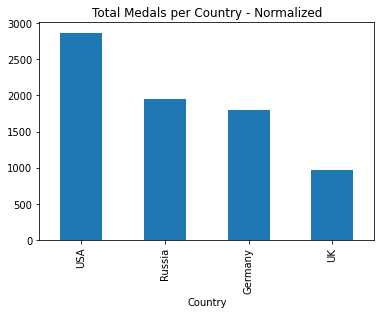

In [ ]:
total_medals_pivot['All'].plot.bar(title="Total Medals per Country - Normalized");

# Dataset Overview

In [ ]:
atl.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

In [ ]:
atl.shape

(271116, 15)

In [ ]:
#There are more than 2M null values within medal column as not all athletes win
print(atl.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [ ]:
atl.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
#Let's see the different Sports
olym['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

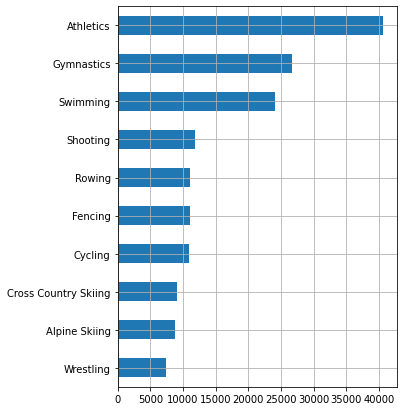

In [ ]:
#Let's review the most common Sports in the games
ol = olym.Sport.value_counts().head(10).plot.barh(figsize=(5, 7),grid=True)
ol.invert_yaxis()

In [ ]:
#Let's see if we can drop some of the marginal Sports? 
olym.Sport.isin(['Softball']).sum()

478

Reviewing Summer and Winter Games

In [ ]:
Summer_olym = olym.query("Season == 'Summer'")
Winter_olym = olym.query("Season == 'Winter'")
Summer_olym['ID'].count()

222552

In [ ]:
#Summer and winter games maintain a 4:1 ration

Winter_olym['ID'].count()

48564

# Micro Analysis (Objective #1)



In [ ]:
olym.groupby('Sex').size()

Sex
F     80156
M    202686
dtype: int64

In [ ]:
olym.groupby(['Year','Sex']). size()

Year  Sex
1896  M       380
1900  F        33
      M      1903
1904  F        16
      M      1285
             ... 
2014  M      2868
2016  F      6223
      M      7465
2021  F      5634
      M      6092
Length: 71, dtype: int64

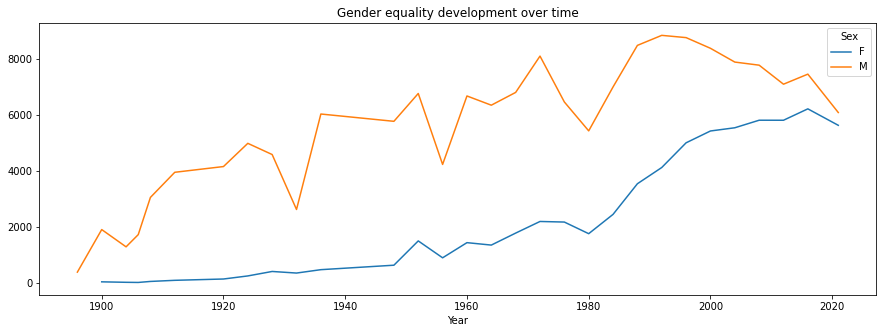

In [ ]:
Summer_olym.groupby(['Year','Sex']).size().unstack(level=-1).plot(figsize=(15,5), title='Gender equality development over time');

# The Winning Athlets formula

We are in search for the winning formula of athletes: age, weight, height 

In [ ]:
#While we started investigating the development of age and the winning number, we found interesting findings:


In [ ]:
# The lightest athlete to participate at the Olympics:
olym.loc[olym['Weight'] == olym.Weight.min()][0:1] 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
40849,21049.0,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN,North Korea


In [ ]:
#The youngest athlete to participate at the Olympics:
olym.loc[olym['Age'] == olym.Age.min()] 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
142882,71691.0,Dimitrios Loundras,M,10.0,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece


In [ ]:
# The oldest athlete to participate at the Olympics:
olym.loc[olym['Age'] == olym.Age.max()] 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
257054,128719.0,John Quincy Adams Ward,M,97.0,NaN,NaN,USA,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA


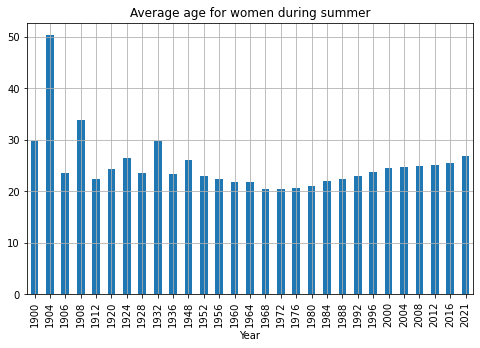

In [ ]:
#In 1904 the age of women practicing Archery in the Olympic games was around 50. We will see that over time athletes are becoming younger

filtered_women_y = olym.drop(['ID', 'Name', 'NOC', 'Games', 'City', 'Event'], axis=1)
filtered_women_y = filtered_women_y.query("Sex == 'F'")

filtered_women_summer = filtered_women_y.query("Season == 'Summer'")
filtered_women_summer.groupby('Year')['Age'].mean().plot(kind='bar',figsize=(8, 5), grid=True, title='Average age for women during summer')

In [ ]:
# The reason we have a spike for women's age at summer 1904 olympics is because the only sports for which we had data is Archery.
# In addition, there was no restriction of athlete's age in the beginning of the 20th century.

filtered_women_summer1904 = filtered_women_summer.query("Year == 1904")
filtered_women_summer1904.Sport.value_counts()

Archery    16
Name: Sport, dtype: int64

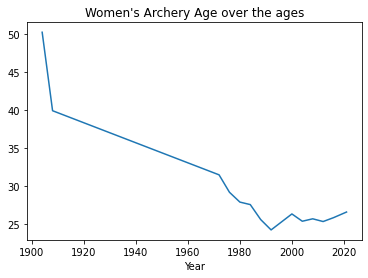

In [ ]:
filtered_women_archery = filtered_women_y[filtered_women_y['Sport'] == 'Archery']
filtered_women_archery.groupby('Year')['Age'].mean().plot(title= "Women's Archery Age over the ages");

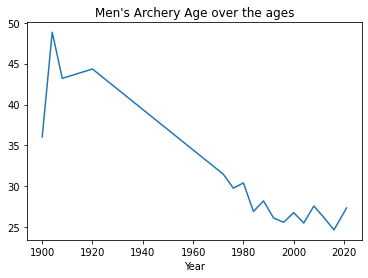

In [ ]:
filtered_men_y = olym.drop(['ID', 'Name', 'NOC', 'Games', 'City', 'Event'], axis=1)
filtered_men_y = filtered_men_y.query("Sex == 'M'")

filtered_men_archery = filtered_men_y[filtered_men_y['Sport'] == 'Archery']
filtered_men_archery.groupby('Year')['Age'].mean().plot(title= "Men's Archery Age over the ages");

Age distribution

In [ ]:
df_ages_under_50 = olym[olym.Age <= 50]
# We decided to remove ages over 50 as they are less than a marginal group, though they increase the median age

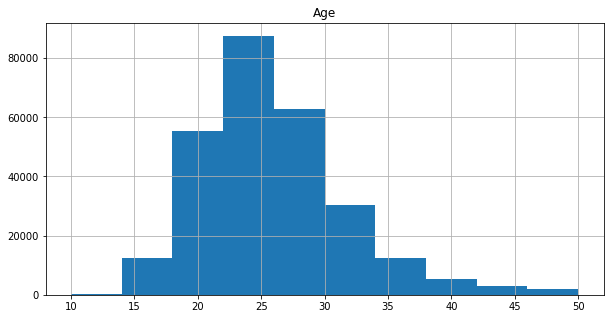

In [ ]:
df_ages_under_50.hist(column=['Age'], figsize=(10,5));

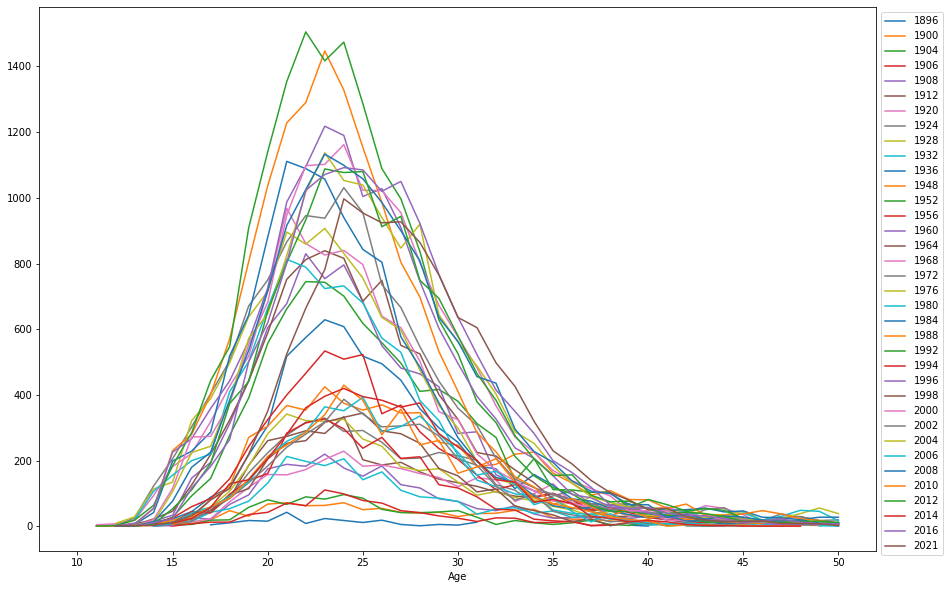

In [ ]:
df_ages_under_50.groupby('Year')['Age'].value_counts(ascending=True).unstack(level=0).plot(figsize=(15,10));
plt.legend(bbox_to_anchor=(1.0, 1.0));

Further analysis for gold winning athletes characteristics

In [ ]:
df_gold_medal = olym.loc[olym['Medal']=='Gold']

Age

In [ ]:
df_gold_medal['Age'].median()

25.0

Weight

In [ ]:
df_gold_medal['Weight'].median()

73.0

Height

In [ ]:
df_gold_medal['Height'].median()

178.0

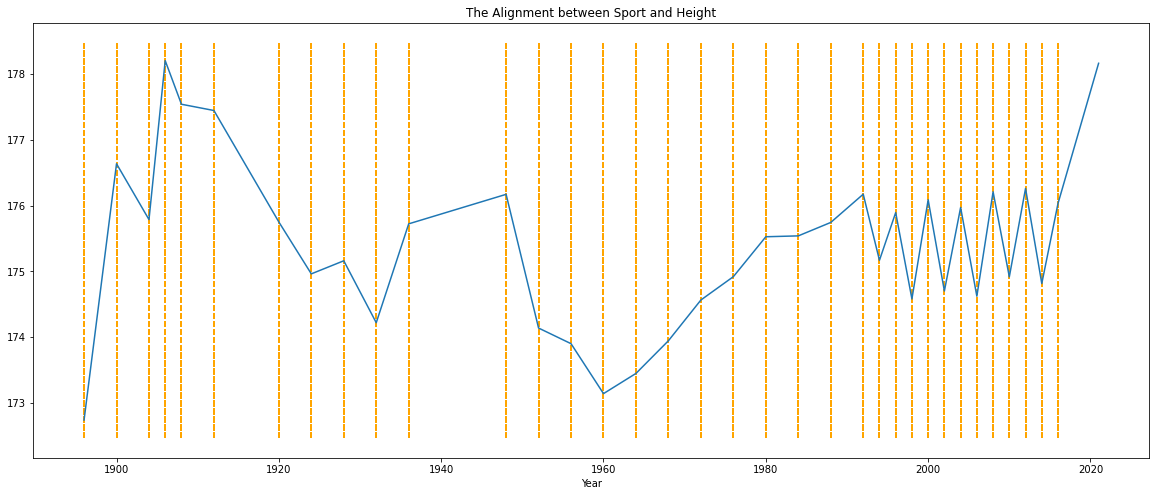

In [ ]:
ax = olym.groupby('Year')['Height'].mean().plot(figsize=(20, 8), title="The Alignment between Sport and Height");
ymin, ymax = ax.get_ylim()
ax.vlines(x=atl.Year, ymin=ymin, ymax=ymax, color='orange', linestyles='dashed');
# We can see that the indentation comes into effect at 1992, when the Summer and Winter games were separated, and height
# played a crucial part in the sports specification

Let's check why there is an exception in height for Tokyo 2020:

In [ ]:
# We would like to review if all Sports have full dataset of heights and if not, who doesn't? Specifically, we are reviewing Tokyo 2021 as we got a big exception in the above graph,"The Alignment between Sport and Height"
with_heights = atl2020[~pd.isnull(atl2020['Height'])]
with_nans = atl2020.groupby("Sport").size()
with_nans.head(5)

Sport
3x3 Basketball           64
Archery                 127
Artistic Gymnastics     193
Artistic Swimming       104
Athletics              2033
dtype: int64

In [ ]:
# Only sports with available height data from the Tokyo 2020 dataset:

with_h = with_heights.groupby("Sport").size()
with_h.head(5)

Sport
3x3 Basketball          64
Artistic Gymnastics    167
Artistic Swimming       48
Athletics               69
Badminton               11
dtype: int64

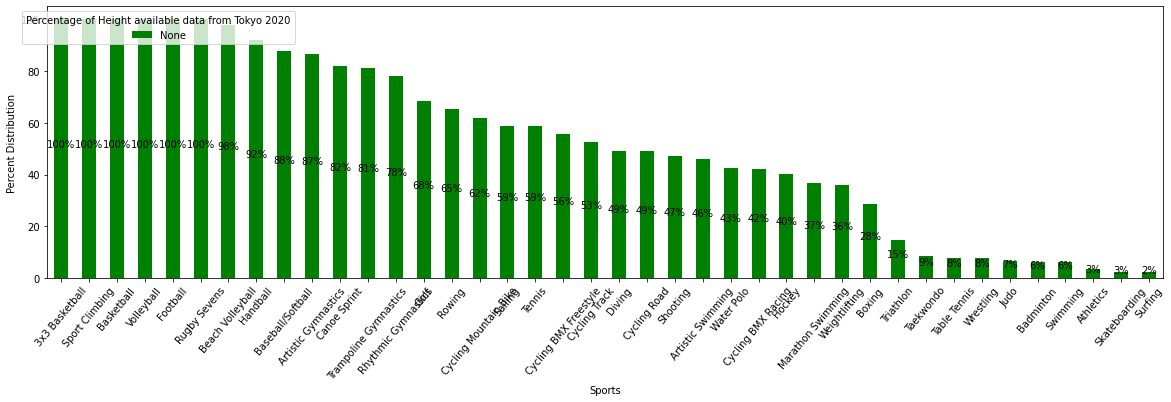

In [ ]:
# Sports by the availability of height data from the Tokyo 2020 dataset:

sliced = with_h.divide(with_nans, fill_value=0).round(4).sort_values(ascending=False)*100
ax_1 = sliced.nlargest(40).plot.bar(figsize=(20,5),stacked=True, rot=50, color='green')
display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Percentage of Height available data from Tokyo 2020");

plt.xlabel('Sports')
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

# As we can see, height data is mostly available for sports where height is relevant,
# which is why it looks like a spike on the chart.

Review the origin of gold medals winners - country and sport

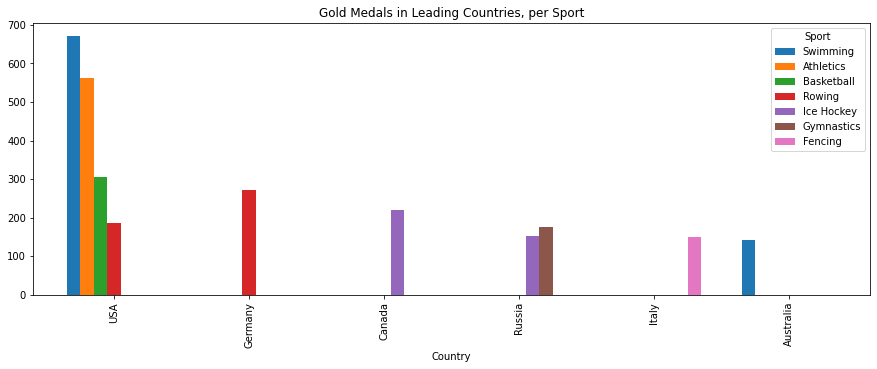

In [ ]:

df_gold_medal.groupby(['Country','Sport']).size().sort_values(ascending=False).head(10).unstack(level=-1).plot.bar(figsize=(15,5), width = 0.7,title="Gold Medals in Leading Countries, per Sport");

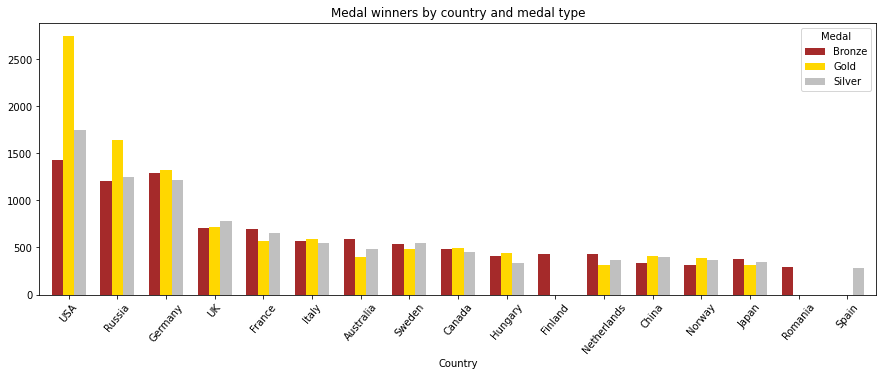

In [ ]:
olym.groupby(['Country', 'Medal']).size().nlargest(45).unstack().plot(width = 0.7, kind='bar',figsize=(15, 5), color=['brown', 'gold', 'silver'], title='Medal winners by country and medal type', rot=50);

Does serial medal winner predicts the future?
We would like to understand wether the repeating participation in the Olympic games increases the winning chance:

In [ ]:
medalists = olym[olym['Medal'].str.contains('Gold' or 'Silver' or 'Bronze', na=False)]
medalists_grp = medalists.groupby('Name')

medal_count = medalists_grp['Medal'].count()
year_gap = medalists_grp['Year'].max()-medalists_grp['Year'].min() #Creating the data for Medal_stats

medal_stats = pd.DataFrame({'Medal Count': medal_count, 'Year Gap': year_gap}) # Creating the dataframe

medal_stats.loc[medal_stats['Year Gap'] > 0].sort_values(by='Year Gap', ascending=False)

,Medal Count,Year Gap
Name,,
Lszl Fbin,2,32
Aladr Gerevich (-Gerei),7,28
Birgit Fischer-Schmidt,8,24
Lin Li,2,24
Mushtaq Ahmed,2,24
...,...,...
Donat Acklin,2,2
Zoltn Imre dn von Halmay,3,2
Kim Gi-Hun,3,2


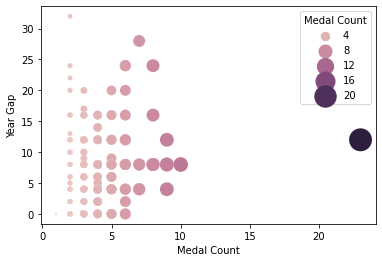

In [ ]:
minsize = min(medal_stats['Medal Count'])**2
maxsize = max(medal_stats['Medal Count'])**2
fx= sns.scatterplot(x=medal_stats['Medal Count'], y=medal_stats['Year Gap'], data=medal_stats, hue=medal_stats['Medal Count'], size=medal_stats['Medal Count'], sizes=(minsize, maxsize))
rcParams['figure.figsize'] = 10,5

# We can see that the particepation in multiple Olympic events does not correlate with multiple medal wins.
# In fact, most multiple medal winners did it in 1 or 2 Olympiads. 

# Macro Analysis (Objective #2)

# USSR vs. Russia Analysis

We wanted to know how the USSR dissolution impacted its ability to win medals. We will create a simulation as if the USSR dissolution did not happen and test how many medals it could have gained

In [ ]:
ussr = olym.copy()
ussr_c = ['Russia', 'Ukraine', 'Belarus', 'Moldova', 'Uzbekistan', 'Kazakhstan', 'Kyrgyzstan'
'Tajikistan', 'Turkmenistan', 'Georgia', 'Azerbaijan', 'Armenia', 'Lithuania', 'Latvia', 'Estonia', 'Soviet Union']

In [ ]:
ussr['Teams'] = olym['Country'].apply(lambda x: 'USSR' if x in ussr_c else x)

In [ ]:
# Creating a dataframe starting from 1960 to compare USSR before and after:
ussr_framed = ussr.drop(ussr[ussr.Year < 1959].index)

In [ ]:
ussr_framed['Timeline'] = ussr_framed['Year'].apply(lambda x: 'Post breakup: 1992-2021' if x > 1991 else 'Before breakup: 1960-1991')

#Isolating only USSR teams
ussr_framed_isolated = ussr_framed[ussr_framed["Teams"] == 'USSR'] 

# Removing 1960 Winter
ussr_framed_isolated = ussr_framed_isolated[~((ussr_framed_isolated['Year'] == 1960) & (ussr_framed_isolated['Season'] == 'Winter'))] 

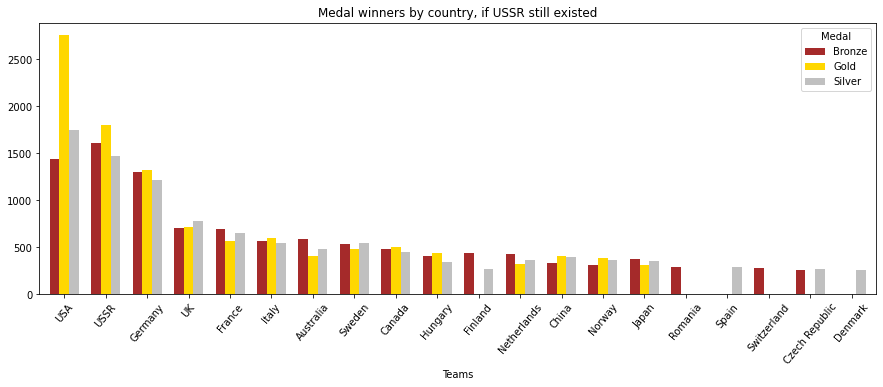

In [ ]:
ussr.groupby(['Teams', 'Medal']).size().nlargest(50).unstack().plot(width=0.7,kind='bar',figsize=(15, 5), color=['brown', 'gold', 'silver'], title='Medal winners by country, if USSR still existed', rot=50);

In [ ]:
ussr.groupby(['Teams', 'Medal']).size().nlargest(20).unstack().dropna() #Medals by top countries, if USSR existed:

Medal,Bronze,Gold,Silver
Teams,,,
USA,1434.0,2750.0,1749.0
USSR,1612.0,1794.0,1467.0
Germany,1295.0,1322.0,1220.0
UK,704.0,717.0,779.0
France,697.0,566.0,651.0
Italy,569.0,594.0,549.0


In [ ]:
response = requests.get('https://i.ibb.co/z7zLyBC/ussr.jpg')
img1 = Image.open(BytesIO(response.content))
background = img1

In [ ]:
 x = ussr_framed_isolated.groupby(['Timeline', 'Medal']).size().nlargest(90).unstack()
 x1 = x.reset_index()['Timeline'].tolist()
 x_bronze = x['Bronze'].tolist()
x_silver = x['Silver'].tolist()
x_gold = x['Gold'].tolist()

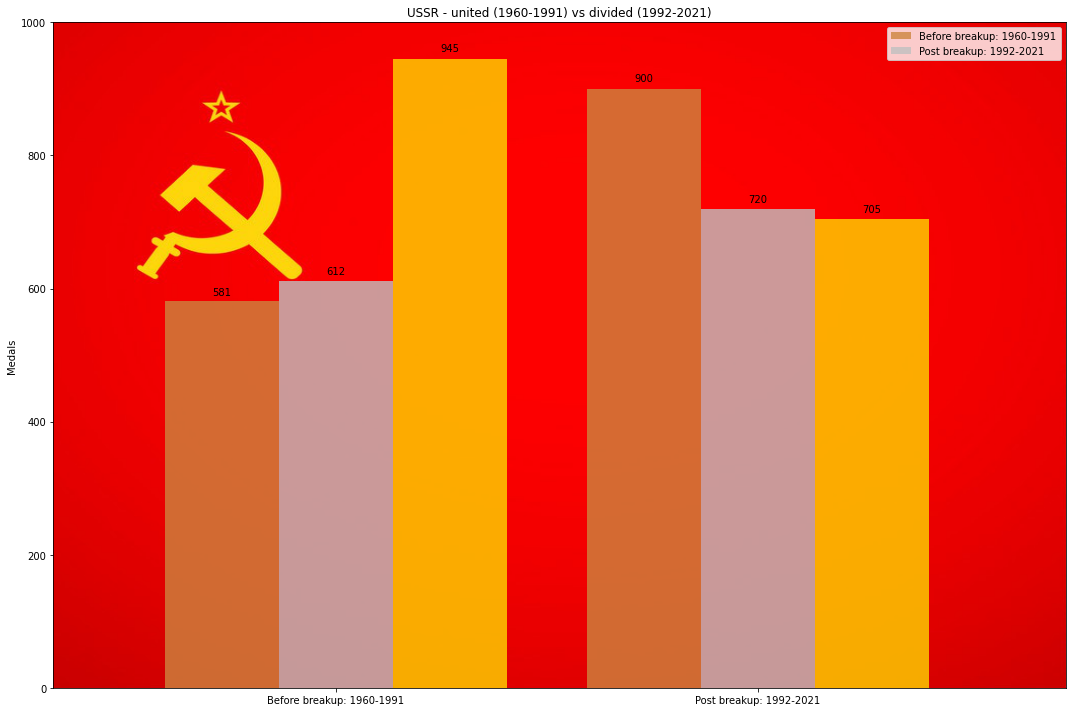

In [ ]:
N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)


rects1 = ax.bar(ind, x_bronze, width, color='peru', alpha=0.8)
rects2 = ax.bar(ind+width, x_silver, width, color='silver', alpha = 0.8)
rects3 = ax.bar(ind+width*2, x_gold, width, color='gold', alpha = 0.8)

ax.set_ylabel('Medals')
ext = [-0.4, 2, 0.00, 1000]
ax.imshow(img1, zorder=0,extent=ext, aspect='auto')


ax.set_xticks(ind+width)
ax.set_xticklabels( x1 )
ax.legend( (rects1[0], rects2[0], rects3[0]), (x1) )



def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.title("USSR - united (1960-1991) vs divided (1992-2021)")
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

# Motivation Index 

We would like to analyze what is the impact of hosting Olympic games. One of our questions is - could it increase the performances of the hosting country?

In [ ]:
olym_adj = olym_adj.query("Season == 'Summer'")

In [ ]:
#We would like to create a list of hosting countries, but first we will amend typos (Sankt Moritz,Athina, Moskva)
olym_adj['City'].replace(['Sankt Moritz','Athina', 'Moskva'],['Saint Moritz','Athens','Moscow'], inplace=True)

In [ ]:
olym_adj['City'].drop_duplicates().sort_values().head(5)

2144    Amsterdam
37      Antwerpen
186        Athens
92        Atlanta
208     Barcelona
Name: City, dtype: object

In [ ]:
# Let's convert cities to countries

df_convert_city_to_country = {'Albertville':'France', 'Amsterdam':'Netherlands','Antwerpen':'Belgium','Athens':'Greece',
                             'Atlanta':'USA','Barcelona':'Spain','Beijing':'China','Berlin':'Germany','Calgary':'Canada',
                             'Chamonix':'France','Cortina_d_Ampezzo':'Italy', 'Garmisch-Partenkirchen':'Germany','Grenoble':'France',
                             'Helsinki':'Finland','Innsbruck':'Austria','Lake Placid':'USA', 'Lillehammer':'Norway',
                             'London':'UK','Los Angeles':'USA','Melbourne':'Australia','Mexico City':'Mexico',
                             'Montreal':'Canada',
                             'Moscow':'Russia','Munich':'Germany','Nagano':'Japan','Oslo':'Norway', 'Paris': 'France',
                             'Rio de Janeiro':'Brazil',
                             'Roma':'Italy','Saint Moritz':'Switzerland', 'Salt Lake City':'USA','Sapporo':'Japan',
                             'Sarajevo':'Bosnia','Seoul':'Korea','Sochi':'Russia','Squaw Valley':'USA','St. Louis':'USA',
                             'Stockholm':'Sweden','Sydney':'Australia','Tokyo':'Japan','Torino':'Italy','VancouverAlberta':'Canada'}

In [ ]:
olym_adj['Hosting_Country'] = olym_adj['City'].map(df_convert_city_to_country) 

In [ ]:
#We will create a df where the hosting coutry equals to the country's name

df_Hosting_Country_by_team = olym_adj[['Year','Hosting_Country','Country','medals_Won']]

In [ ]:
df_condition_per_hosting_country = df_Hosting_Country_by_team['Country'] == df_Hosting_Country_by_team['Hosting_Country']

In [ ]:
df_Hosting_Countries = df_Hosting_Country_by_team[df_condition_per_hosting_country]

In [ ]:
# For our following graph, "Leading Olympic Countries Performance", we would like to display a trend. Therefore, we decided to 'smoothen' the reults and drop the winter results which distort the findings
total_medals_Won = total_medals_Won.query("Season == 'Summer'")

In [ ]:
total_medals_Won_1 = total_medals_Won.groupby(['Year','Country'])['medals_Won_Updated'].agg('sum').reset_index()

In [ ]:
Hosting_country_merged_medals = df_Hosting_Countries.merge(total_medals_Won,
                                           left_on = ['Year', 'Country'],
                                           right_on = ['Year', 'Country'],
                                           how = 'left')

In [ ]:
#We will merge total medals to the hosting country chart and get the full list of hosting countries and thier trophies

Hosting_country_merged_medals = df_Hosting_Countries.merge(total_medals_Won,
                                           how = 'inner',
                                           on = ['Year', 'Country']
                                           )

In [ ]:
df_Hosting_countries_final = Hosting_country_merged_medals.drop_duplicates().sort_values(by='Year',ascending=False)

In [ ]:
df_Hosting_countries_final.head(1)

,Year,Hosting_Country,Country,medals_Won_x,Event,Medal,Sport,Season,medals_Won_y,Event_Category,medals_Won_Updated,medals_Won_Russia
454931,2016,Brazil,Brazil,1.0,Taekwondo Men's Heavyweight,Bronze,Taekwondo,Summer,1.0,1,1.0,Brazil


Let's review medals history per leading hosting countries: USA, UK, Brazil

In [ ]:
Leading_Countries = ['USA','Russia','UK','Brazil']

In [ ]:
Countries_performance = pd.pivot_table(total_medals_Won_1,
                                  index = 'Year',
                                  columns = 'Country',
                                  values = 'medals_Won_Updated',
                                  aggfunc = 'sum').sort_values(by='Year',ascending=True)[Leading_Countries]

In [ ]:
Countries_performance.head(1)

Country,USA,Russia,UK,Brazil
Year,,,,
1896,19.0,NaN,9.0,NaN


In [ ]:
Countries_performance.fillna(0).head(1)

Country,USA,Russia,UK,Brazil
Year,,,,
1896,19.0,0.0,9.0,0.0


In [ ]:
# Before we run the code, we would like to standartize Russia's data. We manipulated it for the USSR excerise. Now we would like to see a trend regardless of USSR's dissolution 

total_medals_Won['medals_Won_Russia'] = total_medals_Won['Country'].apply(lambda x: 'Russia' if x == 'Soviet Union' else x)


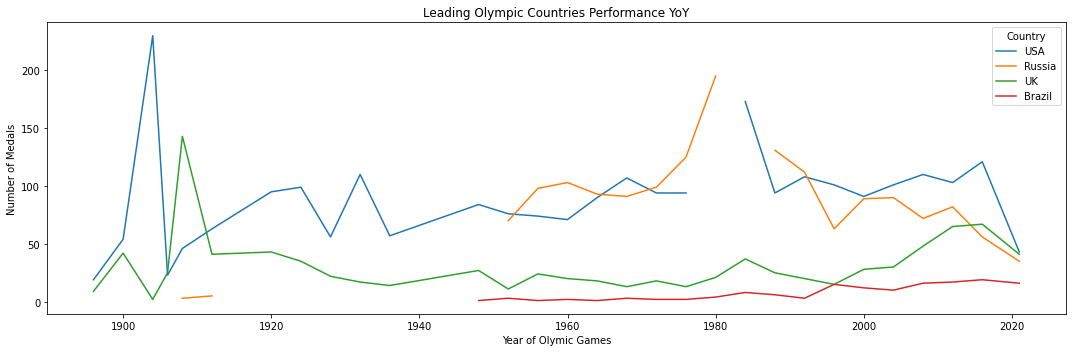

In [ ]:
Countries_performance.plot(figsize=(15,5), xlabel=('Year of Olymic Games'), ylabel=('Number of Medals'),title="Leading Olympic Countries Performance YoY");

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



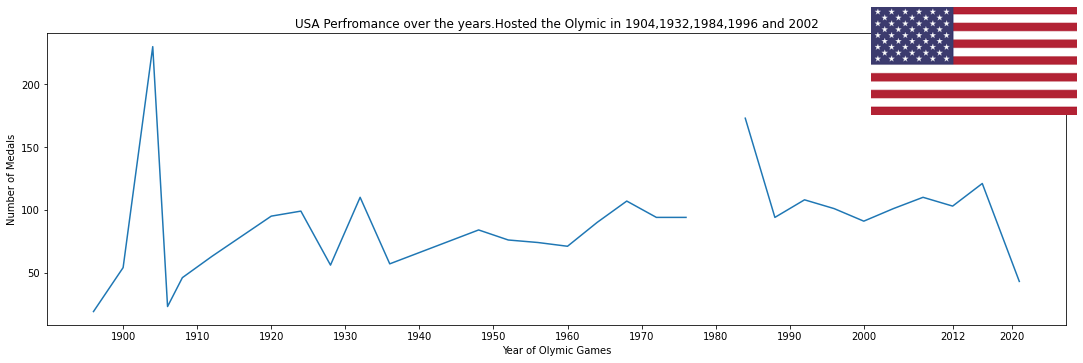

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread(my_path+'/usa.image.png')
fig, ax = plt.subplots()
ax = Countries_performance.USA.plot(figsize=(15,5), xlabel=('Year of Olymic Games'), ylabel=('Number of Medals'),title="USA Perfromance over the years.Hosted the Olymic in 1904,1932,1984,1996 and 2002");
plt.xticks([1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2012,2020]);
ax.plot();
newax = fig.add_axes([0.7,0.7,0.3,0.3], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')
plt.show();

In [ ]:
# before we run the code for Russia, we need a specific adjustment in order to standartize different definitions for Russia (Soviet Union) 

total_medals_Won['medals_Won_Russia'] = total_medals_Won['Country'].apply(lambda x: 'Russia' if x == 'Soviet Union' else x)


In [ ]:
Countries_performance_Russia = pd.pivot_table(total_medals_Won,
                                  index = 'Year',
                                  columns = 'medals_Won_Russia',
                                  values = 'medals_Won_Updated',
                                  aggfunc = 'sum').sort_values(by='Year',ascending=True)[Leading_Countries]

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



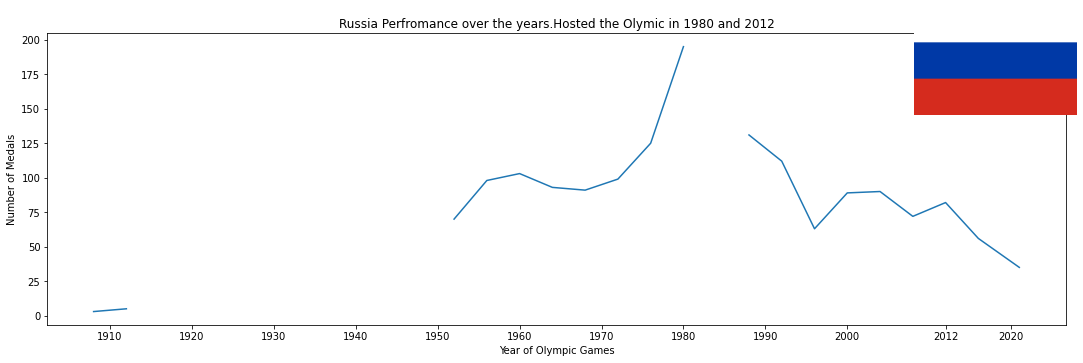

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50];
plt.rcParams["figure.autolayout"] = True
im_russia = plt.imread(my_path+'/Russia_img.svg')
fig, ax = plt.subplots();
Countries_performance_Russia.Russia.plot(figsize=(15,5), xlabel=('Year of Olympic Games'), ylabel=('Number of Medals'),title="Russia Perfromance over the years.Hosted the Olymic in 1980 and 2012");
plt.xticks([1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2012,2020]);
ax.plot();
newax = fig.add_axes([0.7,0.7,0.3,0.3], anchor='NE', zorder=1)
newax.imshow(im_russia);
newax.axis('off')
plt.show();

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



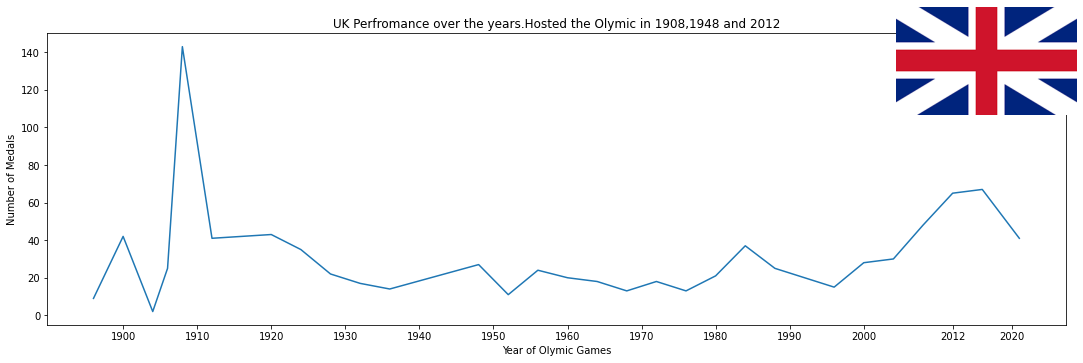

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50];
plt.rcParams["figure.autolayout"] = True
im_uk = plt.imread(my_path+'/GBR.png')
fig, ax = plt.subplots();
Countries_performance.UK.plot(figsize=(15,5), xlabel=('Year of Olymic Games'), ylabel=('Number of Medals'),title="UK Perfromance over the years.Hosted the Olymic in 1908,1948 and 2012");
plt.xticks([1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2012,2020]);
ax.plot();
newax = fig.add_axes([0.7,0.7,0.3,0.3], anchor='NE', zorder=1)
newax.imshow(im_uk);
newax.axis('off')
plt.show();


# ROI - Investment VS. Medals 

 USA case study

In [ ]:
df_USA_funding.replace('Ski&Snowboarding', "Snowboarding", inplace = True)

In [ ]:
Funding = df_USA_funding

In [ ]:
Funding.rename(columns=({"Total Funding (millions)": "Funds"}),inplace=True)

In [ ]:
Funding.groupby(['Sport','Funds']).sum().head(1)

,
Sport,Funds
Archery,11.2


In [ ]:

Funding = total_medals_Won.merge(df_USA_funding,
                                on = 'Sport',
                                how = 'outer')

In [ ]:
Funding.rename(columns=({"Total Funding (millions)": "Funds"}),inplace=True)

In [ ]:
Funding_USA = Funding.groupby(['Sport','Funds','Country']).sum().query("Country == 'USA'")


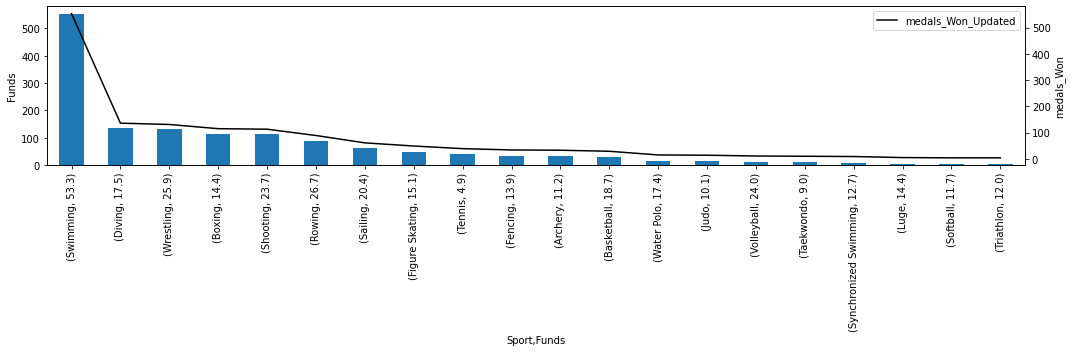

In [ ]:
a1=Funding_USA.groupby(['Sport','Funds'])['medals_Won_Updated'].sum().sort_values(ascending=False).head(20)

ax =  a1.plot.bar(x='Sport',y='Funds', ylabel='Funds', figsize=(15, 5), rot=90)
a1.plot(x='Sport',y='medals_Won_Updated', c='k', ax=ax, use_index=False, secondary_y=True, mark_right=False, rot=90)
ax.right_ax.set_ylabel('medals_Won');
plt.legend(['medals_Won_Updated','Funds']);

UK case study

In [ ]:
UK_Funding_Updated.head(2)

,Sport,Sydney,Athens,Beijing,London,Rio_de_Janeiro
0,Archery,NaN,0.8,2.834,4.408,2.952
1,Athletics,10.6,11.4,26.5,25.1,26.8


In [ ]:
UK_Funding_Updated['London'].fillna(0, inplace=True)
UK_Funding_Updated['Sydney'].fillna(0, inplace=True)
UK_Funding_Updated['Athens'].fillna(0, inplace=True)
UK_Funding_Updated['Beijing'].fillna('n/a',inplace=True)
UK_Funding_Updated['Rio_de_Janeiro'].fillna(0, inplace=True)

In [ ]:
column_list = ['Sydney','Athens','London','Beijing','Rio_de_Janeiro']
UK_Funding_Updated['Total']= UK_Funding_Updated[column_list].sum(axis=1)

In [ ]:
print (UK_Funding_Updated.columns.tolist())

['Sport', 'Sydney', 'Athens', 'Beijing', 'London', 'Rio_de_Janeiro', 'Total']


In [ ]:
UK_Funding_Updated_merged = total_medals_Won.merge(UK_Funding_Updated,
                                on = 'Sport',
                                how = 'outer')

In [ ]:
UK_Funding_Updated_merged_2 = UK_Funding_Updated_merged.groupby(['Sport','Total','Country']).sum().query("Country == 'UK'")

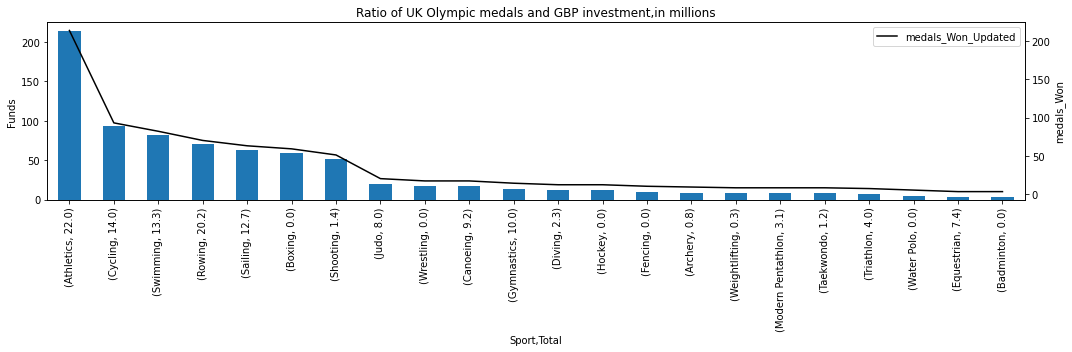

In [ ]:
a1=UK_Funding_Updated_merged_2.groupby(['Sport','Total'])['medals_Won_Updated'].sum().sort_values(ascending=False).head(30)

ax =  a1.plot.bar(x='Sport',y='Total', ylabel='Funds', figsize=(15, 5), rot=90, title='Ratio of UK Olympic medals and GBP investment,in millions')
a1.plot(x='Sport',y='medals_Won_Updated', c='k', ax=ax, use_index=False, secondary_y=True, mark_right=False, rot=90)
ax.right_ax.set_ylabel('medals_Won');
plt.legend();

************************

ROI- National Review - China GDP growth and the Olympic games performance

In [ ]:
total_medals_Won_china = total_medals_Won[total_medals_Won['Country'] == 'China']

In [ ]:
total_medals_Won_china.groupby('Year')['medals_Won_Updated'].sum()

Year
1984     32.0
1988     28.0
1992     53.0
1996     51.0
2000     58.0
2004     64.0
2008    100.0
2012     89.0
2016     70.0
2021     40.0
Name: medals_Won_Updated, dtype: float64

In [ ]:
df_china_GDP_updated = df_china_GDP.merge(total_medals_Won_china,
                                on = 'Year',
                                how = 'inner')

In [ ]:
df_china_medals_grouped_year = df_china_GDP_updated.groupby('Year')['medals_Won_Updated'].sum()

In [ ]:
df_china_GDP_updated_grouped_by_year = df_china_GDP_updated.groupby('Year')['GDP'].sum()

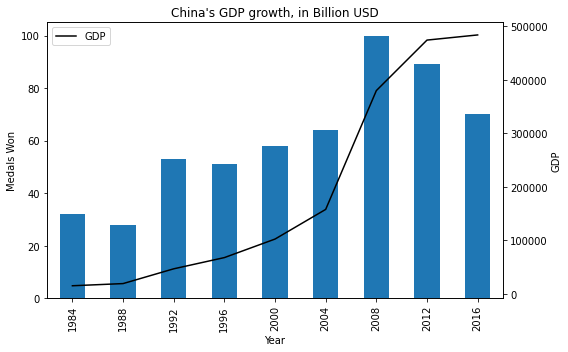

In [ ]:
ax =  df_china_medals_grouped_year.plot.bar(x='Year',y='medals_Won_Updated', ylabel='Medals Won', figsize=(8, 5))
df_china_GDP_updated_grouped_by_year.plot(x='Year',y='GDP', c='k', ax=ax, use_index=False, secondary_y=True, mark_right=False, rot=90, title="China's GDP growth, in Billion USD")
ax.right_ax.set_ylabel('GDP');
plt.legend();